<a href="https://www.kaggle.com/code/georgeselkassouf/gdac-case-study-cyclistic-bike-share?scriptVersionId=97836894" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### **This case study is part of the Google Data Analytics Professional Certificate**

# Step 1: Collect Data

## Install required packages

In [1]:
library("tidyverse")
library("dplyr")
library("lubridate")
library("ggplot2")
library("zoo")
library("janitor")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Loading the files

In [2]:
Apr_2021 <- read_csv("../input/cyclistic-trip-data/202104-divvy-tripdata.csv")
May_2021 <- read_csv("../input/cyclistic-trip-data/202105-divvy-tripdata.csv")
Jun_2021 <- read_csv("../input/cyclistic-trip-data/202106-divvy-tripdata.csv")
Jul_2021 <- read_csv("../input/cyclistic-trip-data/202107-divvy-tripdata.csv")
Aug_2021 <- read_csv("../input/cyclistic-trip-data/202108-divvy-tripdata.csv")
Sep_2021 <- read_csv("../input/cyclistic-trip-data/202109-divvy-tripdata.csv")
Oct_2021 <- read_csv("../input/cyclistic-trip-data/202110-divvy-tripdata.csv")
Nov_2021 <- read_csv("../input/cyclistic-trip-data/202111-divvy-tripdata.csv")
Dec_2021 <- read_csv("../input/cyclistic-trip-data/202112-divvy-tripdata.csv")
Jan_2022 <- read_csv("../input/cyclistic-trip-data/202201-divvy-tripdata.csv")
Feb_2022 <- read_csv("../input/cyclistic-trip-data/202202-divvy-tripdata.csv")
Mar_2022 <- read_csv("../input/cyclistic-trip-data/202203-divvy-tripdata.csv")

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 337230 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ride_id, rideable_type, started_at, ended_at, start_station_name, ...
dbl  (5): start_lat, start_lng, end_lat, end_lng, day_of_week
time (1): ride_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 531633 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ride_id, rideable_type, started_at, ended_at, start_station_name, ...
dbl  (5): start_lat, start_lng, end_lat, end_lng, day_of_week
time (1): ride_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types 

# Step 2: Wrangle Data and Combine Files into a Single File
## Compare column names for all the files

In [3]:
colnames(Apr_2021)
colnames(May_2021)
colnames(Jun_2021)
colnames(Jul_2021)
colnames(Aug_2021)
colnames(Sep_2021)
colnames(Oct_2021)
colnames(Nov_2021)
colnames(Dec_2021)
colnames(Jan_2022)
colnames(Feb_2022)
colnames(Mar_2022)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

## Rename columns to make them consistent

In [4]:
(Apr_2021 <- rename(Apr_2021
                   ,bike_type = rideable_type
                   ,start_time = started_at
                   ,end_time = ended_at
                   ,from_station  = start_station_name
                   ,to_station = end_station_name
                   ,user_type = member_casual))

(May_2021 <- rename(May_2021
                    ,bike_type = rideable_type
                    ,start_time = started_at
                    ,end_time = ended_at
                    ,from_station  = start_station_name
                    ,to_station = end_station_name
                    ,user_type = member_casual))

(Jun_2021 <- rename(Jun_2021
                    ,bike_type = rideable_type
                    ,start_time = started_at
                    ,end_time = ended_at
                    ,from_station  = start_station_name
                    ,to_station = end_station_name
                    ,user_type = member_casual))

(Jul_2021 <- rename(Jul_2021
                    ,bike_type = rideable_type
                    ,start_time = started_at
                    ,end_time = ended_at
                    ,from_station  = start_station_name
                    ,to_station = end_station_name
                    ,user_type = member_casual))

(Aug_2021 <- rename(Aug_2021
                    ,bike_type = rideable_type
                    ,start_time = started_at
                    ,end_time = ended_at
                    ,from_station  = start_station_name
                    ,to_station = end_station_name
                    ,user_type = member_casual))

(Sep_2021 <- rename(Sep_2021
                    ,bike_type = rideable_type
                    ,start_time = started_at
                    ,end_time = ended_at
                    ,from_station  = start_station_name
                    ,to_station = end_station_name
                    ,user_type = member_casual))

(Oct_2021 <- rename(Oct_2021
                    ,bike_type = rideable_type
                    ,start_time = started_at
                    ,end_time = ended_at
                    ,from_station  = start_station_name
                    ,to_station = end_station_name
                    ,user_type = member_casual))

(Nov_2021 <- rename(Nov_2021
                    ,bike_type = rideable_type
                    ,start_time = started_at
                    ,end_time = ended_at
                    ,from_station  = start_station_name
                    ,to_station = end_station_name
                    ,user_type = member_casual))

(Dec_2021 <- rename(Dec_2021
                    ,bike_type = rideable_type
                    ,start_time = started_at
                    ,end_time = ended_at
                    ,from_station  = start_station_name
                    ,to_station = end_station_name
                    ,user_type = member_casual))

(Jan_2022 <- rename(Jan_2022
                    ,bike_type = rideable_type
                    ,start_time = started_at
                    ,end_time = ended_at
                    ,from_station  = start_station_name
                    ,to_station = end_station_name
                    ,user_type = member_casual))

(Feb_2022 <- rename(Feb_2022
                    ,bike_type = rideable_type
                    ,start_time = started_at
                    ,end_time = ended_at
                    ,from_station  = start_station_name
                    ,to_station = end_station_name
                    ,user_type = member_casual))


(Mar_2022 <- rename(Mar_2022
                    ,bike_type = rideable_type
                    ,start_time = started_at
                    ,end_time = ended_at
                    ,from_station  = start_station_name
                    ,to_station = end_station_name
                    ,user_type = member_casual))

ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
6C992BD37A98A63F,classic_bike,12/04/2021 18:25,12/04/2021 18:56,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,00:31:19,2
1E0145613A209000,docked_bike,27/04/2021 17:27,27/04/2021 18:31,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,01:04:18,3
E498E15508A80BAD,docked_bike,03/04/2021 12:42,07/04/2021 11:40,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,22:57:39,7
1887262AD101C604,classic_bike,17/04/2021 09:17,17/04/2021 09:42,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,00:25:06,7
C123548CAB2A32A5,docked_bike,03/04/2021 12:42,03/04/2021 14:13,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,01:31:17,7
097E76F3651B1AC1,classic_bike,25/04/2021 18:43,25/04/2021 18:43,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,00:00:41,1
53C38EB01E6FA5C4,classic_bike,03/04/2021 16:28,03/04/2021 16:29,Ashland Ave & 63rd St,16948,Ashland Ave & 63rd St,16948,41.77937,-87.66484,41.77937,-87.66484,casual,00:01:26,7
D53AC014EFD6E2BA,electric_bike,06/04/2021 16:35,06/04/2021 17:00,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80583,-87.59248,41.80580,-87.59266,casual,00:25:50,3
6E2F7CA1FA9E0AFB,classic_bike,12/04/2021 15:22,12/04/2021 16:15,Ashland Ave & 63rd St,16948,Ashland Ave & 63rd St,16948,41.77937,-87.66484,41.77937,-87.66484,casual,00:52:54,2


ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
C809ED75D6160B2A,electric_bike,30/05/2021 11:58,30/05/2021 12:10,NA,NA,NA,NA,41.90000,-87.63000,41.89000,-87.61000,casual,00:12:24,1
DD59FDCE0ACACAF3,electric_bike,30/05/2021 11:29,30/05/2021 12:14,NA,NA,NA,NA,41.88000,-87.62000,41.79000,-87.58000,casual,00:44:55,1
0AB83CB88C43EFC2,electric_bike,30/05/2021 14:24,30/05/2021 14:25,NA,NA,NA,NA,41.92000,-87.70000,41.92000,-87.70000,casual,00:01:12,1
7881AC6D39110C60,electric_bike,30/05/2021 14:25,30/05/2021 14:41,NA,NA,NA,NA,41.92000,-87.70000,41.94000,-87.69000,casual,00:15:13,1
853FA701B4582BAF,electric_bike,30/05/2021 18:15,30/05/2021 18:22,NA,NA,NA,NA,41.94000,-87.69000,41.94000,-87.70000,casual,00:06:53,1
F5E63DFD96B2A737,electric_bike,30/05/2021 11:33,30/05/2021 11:57,NA,NA,NA,NA,41.88000,-87.63000,41.89000,-87.62000,casual,00:23:36,1
C884951E36656727,electric_bike,30/05/2021 10:51,30/05/2021 11:06,NA,NA,NA,NA,41.93000,-87.70000,41.90000,-87.69000,casual,00:14:43,1
48B60B250FE75AF9,electric_bike,05/05/2021 13:57,05/05/2021 14:14,NA,NA,NA,NA,41.78000,-87.64000,41.78000,-87.64000,casual,00:17:55,4
E3D0CC2FE1359880,electric_bike,05/05/2021 11:31,05/05/2021 11:34,NA,NA,NA,NA,41.78000,-87.64000,41.78000,-87.64000,casual,00:02:37,4


ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
99FEC93BA843FB20,electric_bike,13/06/2021 14:31,13/06/2021 14:34,NA,NA,NA,NA,41.80,-87.59,41.80000,-87.6000,member,00:02:43,1
06048DCFC8520CAF,electric_bike,04/06/2021 11:18,04/06/2021 11:24,NA,NA,NA,NA,41.79,-87.59,41.80000,-87.6000,member,00:06:17,6
9598066F68045DF2,electric_bike,04/06/2021 09:49,04/06/2021 09:55,NA,NA,NA,NA,41.80,-87.60,41.79000,-87.5900,member,00:05:59,6
B03C0FE48C412214,electric_bike,03/06/2021 19:56,03/06/2021 20:21,NA,NA,NA,NA,41.78,-87.58,41.80000,-87.6000,member,00:25:50,5
B9EEA89F8FEE73B7,electric_bike,04/06/2021 14:05,04/06/2021 14:09,NA,NA,NA,NA,41.80,-87.59,41.79000,-87.5900,member,00:04:08,6
62B943CEAAA420BA,electric_bike,03/06/2021 19:32,03/06/2021 19:38,NA,NA,NA,NA,41.78,-87.58,41.78000,-87.5800,member,00:06:45,5
7E2546FBA79C46EE,electric_bike,10/06/2021 16:30,10/06/2021 16:36,NA,NA,NA,NA,41.79,-87.60,41.79000,-87.5900,member,00:06:11,5
3DDF3BBF6C4C3C89,electric_bike,10/06/2021 17:00,10/06/2021 17:06,NA,NA,NA,NA,41.79,-87.59,41.80000,-87.5900,member,00:06:18,5
2608805637155AB6,electric_bike,10/06/2021 12:46,10/06/2021 12:55,NA,NA,NA,NA,41.93,-87.67,41.94000,-87.6800,member,00:08:46,5


ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
0A1B623926EF4E16,docked_bike,02/07/2021 14:44,02/07/2021 15:19,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.88398,-87.62468,41.89937,-87.64848,casual,00:35:22,6
B2D5583A5A5E76EE,classic_bike,07/07/2021 16:57,07/07/2021 17:16,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.90036,-87.69670,41.88990,-87.67147,casual,00:18:27,4
6F264597DDBF427A,classic_bike,25/07/2021 11:30,25/07/2021 11:48,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.86038,-87.62581,41.89017,-87.62619,member,00:17:50,1
379B58EAB20E8AA5,classic_bike,08/07/2021 22:08,08/07/2021 22:23,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.90036,-87.69670,41.89456,-87.65345,member,00:15:02,5
6615C1E4EB08E8FB,electric_bike,28/07/2021 16:08,28/07/2021 16:27,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.90035,-87.69668,41.88659,-87.65839,casual,00:19:03,4
62DC2B32872F9BA8,electric_bike,29/07/2021 17:09,29/07/2021 17:15,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.90033,-87.69674,41.91389,-87.70513,casual,00:05:52,5
4BBB6E80E6A2A16D,classic_bike,28/07/2021 16:51,28/07/2021 17:03,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.90036,-87.69670,41.91403,-87.70513,casual,00:11:58,4
22CA03D32C6BB094,classic_bike,03/07/2021 12:44,03/07/2021 12:52,Clark St & North Ave,13128,Clark St & Chicago Ave,13303,41.91197,-87.63194,41.89675,-87.63089,casual,00:08:05,7
61F0D07D1EEE72EE,classic_bike,02/07/2021 18:18,02/07/2021 18:38,Sheridan Rd & Montrose Ave,TA1307000107,Southport Ave & Clybourn Ave,TA1309000030,41.96167,-87.65464,41.92077,-87.66371,member,00:19:59,6


ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
99103BB87CC6C1BB,electric_bike,10/08/2021 17:15,10/08/2021 17:22,NA,NA,NA,NA,41.77000,-87.68000,41.77000,-87.68000,member,00:06:55,3
EAFCCCFB0A3FC5A1,electric_bike,10/08/2021 17:23,10/08/2021 17:39,NA,NA,NA,NA,41.77000,-87.68000,41.77000,-87.63000,member,00:16:10,3
9EF4F46C57AD234D,electric_bike,21/08/2021 02:34,21/08/2021 02:50,NA,NA,NA,NA,41.95000,-87.65000,41.97000,-87.66000,member,00:16:13,7
5834D3208BFAF1DA,electric_bike,21/08/2021 06:52,21/08/2021 07:08,NA,NA,NA,NA,41.97000,-87.67000,41.95000,-87.65000,member,00:15:18,7
CD825CB87ED1D096,electric_bike,19/08/2021 11:55,19/08/2021 12:04,NA,NA,NA,NA,41.79000,-87.60000,41.77000,-87.62000,member,00:08:42,5
612F12C94A964F3E,electric_bike,19/08/2021 12:41,19/08/2021 12:47,NA,NA,NA,NA,41.81000,-87.61000,41.80000,-87.60000,member,00:06:35,5
C7435946FDFFA9B7,electric_bike,19/08/2021 12:21,19/08/2021 12:37,NA,NA,NA,NA,41.77000,-87.62000,41.81000,-87.61000,member,00:15:41,5
C67017767EED2251,electric_bike,13/08/2021 14:52,13/08/2021 14:58,NA,NA,Clark St & Grace St,TA1307000127,41.94000,-87.64000,41.95087,-87.65915,member,00:05:41,6
ABC4532F2B4983AB,electric_bike,17/08/2021 18:23,17/08/2021 18:24,NA,NA,NA,NA,41.92000,-87.66000,41.92000,-87.66000,member,00:00:18,3


ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
BE93718DC9182ED6,classic_bike,29/09/2021 17:04,29/09/2021 17:04,Shields Ave & 28th Pl,15443,Shields Ave & 28th Pl,15443,41.84273,-87.63549,41.84273,-87.63549,member,NA,4
6E5FD2F624AC87D3,classic_bike,01/09/2021 17:49,01/09/2021 17:49,Clybourn Ave & Division St,TA1307000115,Clybourn Ave & Division St,TA1307000115,41.90461,-87.64055,41.90461,-87.64055,member,NA,4
FA4DC99A39C36D54,classic_bike,29/09/2021 16:53,29/09/2021 16:53,Financial Pl & Ida B Wells Dr,SL-010,Financial Pl & Ida B Wells Dr,SL-010,41.87502,-87.63309,41.87502,-87.63309,member,NA,4
85BC495341AB2F18,electric_bike,01/09/2021 18:45,01/09/2021 18:45,Halsted St & Dickens Ave,13192,Halsted St & Dickens Ave,13192,41.91988,-87.64879,41.91991,-87.64878,member,NA,4
5F9FAEC899BAFDCF,classic_bike,29/09/2021 15:40,29/09/2021 15:40,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.95283,-87.64999,41.95283,-87.64999,member,NA,4
7C194D321B885287,classic_bike,29/09/2021 14:02,29/09/2021 14:02,Throop St & Taylor St,13139,Throop St & Taylor St,13139,41.86897,-87.65914,41.86897,-87.65914,member,NA,4
CAE29510F94F312A,classic_bike,29/09/2021 15:21,29/09/2021 15:21,Canal St & Monroe St,13056,Canal St & Monroe St,13056,41.88169,-87.63953,41.88169,-87.63953,member,NA,4
082A465904C062EF,classic_bike,26/09/2021 11:15,26/09/2021 11:15,Clark St & Elm St,TA1307000039,Clark St & Elm St,TA1307000039,41.90297,-87.63128,41.90297,-87.63128,casual,NA,1
41725EA31D3BB35A,electric_bike,11/09/2021 13:16,11/09/2021 13:16,California Ave & North Ave,13258,California Ave & North Ave,13258,41.91049,-87.69693,41.91049,-87.69693,casual,NA,7


ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
620BC6107255BF4C,electric_bike,22/10/2021 12:46,22/10/2021 12:49,Kingsbury St & Kinzie St,KA1503000043,NA,NA,41.88919,-87.63850,41.89000,-87.63000,member,00:03:08,6
4471C70731AB2E45,electric_bike,21/10/2021 09:12,21/10/2021 09:14,NA,NA,NA,NA,41.93000,-87.70000,41.93000,-87.71000,member,00:01:37,5
26CA69D43D15EE14,electric_bike,16/10/2021 16:28,16/10/2021 16:36,NA,NA,NA,NA,41.92000,-87.70000,41.94000,-87.72000,member,00:07:47,7
362947F0437E1514,electric_bike,16/10/2021 16:17,16/10/2021 16:19,NA,NA,NA,NA,41.92000,-87.69000,41.92000,-87.69000,member,00:01:15,7
BB731DE2F2EC51C5,electric_bike,20/10/2021 23:17,20/10/2021 23:26,NA,NA,NA,NA,41.89000,-87.71000,41.89000,-87.69000,member,00:08:16,4
7176307BBC097313,electric_bike,21/10/2021 16:57,21/10/2021 17:11,NA,NA,NA,NA,41.89000,-87.71000,41.93000,-87.70000,member,00:14:21,5
E965A041511793A0,electric_bike,21/10/2021 17:46,21/10/2021 17:49,NA,NA,NA,NA,41.93000,-87.70000,41.93000,-87.70000,member,00:02:41,5
E41D986E83D7B7CC,electric_bike,20/10/2021 23:30,20/10/2021 23:38,NA,NA,NA,NA,41.89000,-87.69000,41.89000,-87.71000,member,00:08:21,4
E189D96E36E6FDFD,electric_bike,21/10/2021 18:17,21/10/2021 18:24,NA,NA,NA,NA,41.93000,-87.70000,41.91000,-87.70000,member,00:07:28,5


ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
7C00A93E10556E47,electric_bike,27/11/2021 13:27,27/11/2021 13:46,NA,NA,NA,NA,41.93000,-87.72000,41.96,-87.73,casual,00:19:00,7
90854840DFD508BA,electric_bike,27/11/2021 13:38,27/11/2021 13:56,NA,NA,NA,NA,41.96000,-87.70000,41.92,-87.70,casual,00:17:45,7
0A7D10CDD144061C,electric_bike,26/11/2021 22:03,26/11/2021 22:05,NA,NA,NA,NA,41.96000,-87.70000,41.96,-87.70,casual,00:02:22,6
2F3BE33085BCFF02,electric_bike,27/11/2021 09:56,27/11/2021 10:01,NA,NA,NA,NA,41.94000,-87.79000,41.93,-87.79,casual,00:05:01,7
D67B4781A19928D4,electric_bike,26/11/2021 19:09,26/11/2021 19:30,NA,NA,NA,NA,41.90000,-87.63000,41.88,-87.62,casual,00:21:13,6
02F85C2C3C5F7D46,electric_bike,26/11/2021 18:34,26/11/2021 18:52,Michigan Ave & Oak St,13042,NA,NA,41.90086,-87.62379,41.90,-87.63,casual,00:18:42,6
EF780B807EF7835A,electric_bike,27/11/2021 13:31,27/11/2021 13:37,NA,NA,NA,NA,41.81000,-87.60000,41.80,-87.60,casual,00:06:00,7
17069CC749126036,electric_bike,27/11/2021 14:33,27/11/2021 14:34,NA,NA,NA,NA,41.95000,-87.66000,41.95,-87.66,casual,00:00:42,7
93FC4662BDC5C061,electric_bike,27/11/2021 09:14,27/11/2021 09:19,NA,NA,NA,NA,41.80000,-87.60000,41.79,-87.60,casual,00:05:03,7


ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
46F8167220E4431F,electric_bike,07/12/2021 15:06,07/12/2021 15:13,Laflin St & Cullerton St,13307,Morgan St & Polk St,TA1307000130,41.85483,-87.66366,41.87197,-87.65097,member,00:07:35,3
73A77762838B32FD,electric_bike,11/12/2021 03:43,11/12/2021 04:10,LaSalle Dr & Huron St,KP1705001026,Clarendon Ave & Leland Ave,TA1307000119,41.89441,-87.63233,41.96797,-87.65000,casual,00:26:54,7
4CF42452054F59C5,electric_bike,15/12/2021 23:10,15/12/2021 23:23,Halsted St & North Branch St,KA1504000117,Broadway & Barry Ave,13137,41.89936,-87.64852,41.93758,-87.64410,member,00:12:46,4
3278BA87BF698339,classic_bike,26/12/2021 16:16,26/12/2021 16:30,Halsted St & North Branch St,KA1504000117,LaSalle Dr & Huron St,KP1705001026,41.89939,-87.64854,41.89488,-87.63233,member,00:14:43,1
6FF54232576A3B73,electric_bike,30/12/2021 11:31,30/12/2021 11:51,Leavitt St & Chicago Ave,18058,Clark St & Drummond Pl,TA1307000142,41.89558,-87.68202,41.93125,-87.64434,member,00:20:16,5
93E8D79490E3AB11,classic_bike,01/12/2021 18:28,01/12/2021 18:38,Wabash Ave & 16th St,SL-012,Wells St & Polk St,SL-011,41.86038,-87.62581,41.87260,-87.63350,member,00:09:27,4
135518383C9CACF0,electric_bike,09/12/2021 15:49,09/12/2021 15:55,Laflin St & Cullerton St,13307,Halsted St & Maxwell St,TA1309000001,41.85488,-87.66365,41.86483,-87.64710,member,00:05:58,5
CDF93C212EA9B261,classic_bike,31/12/2021 13:02,31/12/2021 13:20,Clark St & Lake St,KA1503000012,Ashland Ave & Lake St,13073,41.88602,-87.63088,41.88592,-87.66717,casual,00:18:51,6
0FCA94C5F26535C8,electric_bike,20/12/2021 14:25,20/12/2021 14:35,Clark St & Lake St,KA1503000012,Ogden Ave & Chicago Ave,TA1305000020,41.88592,-87.63149,41.89636,-87.65406,member,00:09:55,2


ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
C2F7DD78E82EC875,electric_bike,13/01/2022 11:59,13/01/2022 12:02,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,00:02:57,5
A6CF8980A652D272,electric_bike,10/01/2022 08:41,10/01/2022 08:46,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,00:04:21,2
BD0F91DFF741C66D,classic_bike,25/01/2022 04:53,25/01/2022 04:58,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,00:04:21,3
CBB80ED419105406,classic_bike,04/01/2022 00:18,04/01/2022 00:33,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,00:14:56,3
DDC963BFDDA51EEA,classic_bike,20/01/2022 01:31,20/01/2022 01:37,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,00:06:02,5
A39C6F6CC0586C0B,classic_bike,11/01/2022 18:48,11/01/2022 18:51,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,00:03:22,3
BDC4AB637EDF981B,classic_bike,30/01/2022 18:32,30/01/2022 18:49,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.95434,-87.68608,41.95283,-87.64999,member,00:16:34,1
81751A3186E59A6B,classic_bike,22/01/2022 12:20,22/01/2022 12:32,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.92560,-87.65371,41.93193,-87.67786,member,00:12:04,7
154222B86A338ABD,electric_bike,17/01/2022 07:34,17/01/2022 08:00,Racine Ave & 15th St,13304,Clinton St & Washington Blvd,WL-012,41.86125,-87.65650,41.88338,-87.64117,member,00:25:27,2


ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
E1E065E7ED285C02,classic_bike,19/02/2022 18:08,19/02/2022 18:23,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.88462,-87.62783,41.91569,-87.63460,member,00:15:15,7
1602DCDC5B30FFE3,classic_bike,20/02/2022 17:41,20/02/2022 17:45,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.92914,-87.64908,41.92877,-87.66391,member,00:04:26,1
BE7DD2AF4B55C4AF,classic_bike,25/02/2022 18:55,25/02/2022 19:09,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.88462,-87.62783,41.87926,-87.63990,member,00:13:38,6
A1789BDF844412BE,classic_bike,14/02/2022 11:57,14/02/2022 12:04,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.94815,-87.66394,41.95283,-87.64999,member,00:06:57,2
07DE78092C62F7B3,classic_bike,16/02/2022 05:36,16/02/2022 05:39,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.88462,-87.62783,41.88584,-87.63550,member,00:02:54,4
9A2F204F04AB7E24,classic_bike,07/02/2022 09:51,07/02/2022 10:07,St. Clair St & Erie St,13016,Franklin St & Monroe St,TA1309000007,41.89435,-87.62280,41.88032,-87.63519,member,00:15:56,2
D1E6BB679BDEDEE4,classic_bike,14/02/2022 10:38,14/02/2022 10:42,Wells St & Elm St,KA1504000135,Clark St & Schiller St,TA1309000024,41.90322,-87.63432,41.90799,-87.63150,member,00:03:49,2
DE23C1DC29B40237,classic_bike,08/02/2022 20:12,08/02/2022 20:21,State St & Randolph St,TA1305000029,Desplaines St & Randolph St,15535,41.88462,-87.62783,41.88462,-87.64457,member,00:08:43,3
3E314B0F46667DE9,electric_bike,25/02/2022 13:49,25/02/2022 13:54,Larrabee St & Armitage Ave,TA1309000006,Cherry Ave & Blackhawk St,18069,41.91814,-87.64379,41.90722,-87.65562,member,00:05:38,6


ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
47EC0A7F82E65D52,classic_bike,21/03/2022 13:45,21/03/2022 13:51,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.88688,-87.62603,41.88918,-87.63851,member,00:06:17,2
8494861979B0F477,electric_bike,16/03/2022 09:37,16/03/2022 09:43,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.90100,-87.62375,41.89820,-87.63754,member,00:06:18,4
EFE527AF80B66109,classic_bike,23/03/2022 19:52,23/03/2022 19:54,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.97835,-87.65975,41.98404,-87.66027,member,00:02:46,4
9F446FD9DEE3F389,classic_bike,01/03/2022 19:12,01/03/2022 19:22,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.88688,-87.62603,41.87771,-87.63532,member,00:09:48,3
431128AD9AFFEDC0,classic_bike,21/03/2022 18:37,21/03/2022 19:19,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.91172,-87.62680,41.87794,-87.66201,member,00:42:10,2
9AA8A13AF7A85325,classic_bike,07/03/2022 17:10,07/03/2022 17:15,Bissell St & Armitage Ave,13059,Southport Ave & Clybourn Ave,TA1309000030,41.91802,-87.65218,41.92077,-87.66371,member,00:04:42,2
28E3387BFE2A5E85,electric_bike,10/03/2022 17:21,10/03/2022 17:24,Bissell St & Armitage Ave,13059,Southport Ave & Clybourn Ave,TA1309000030,41.91792,-87.65206,41.92077,-87.66371,member,00:03:17,5
74831EB3EA9CF123,classic_bike,05/03/2022 12:31,05/03/2022 12:42,DuSable Lake Shore Dr & North Blvd,LF-005,Stockton Dr & Wrightwood Ave,13276,41.91172,-87.62680,41.93132,-87.63874,member,00:11:17,7
BD70E7114BC486F1,electric_bike,17/03/2022 17:32,17/03/2022 17:43,Western Ave & Winnebago Ave,13068,Dayton St & North Ave,13058,41.91554,-87.68707,41.91058,-87.64942,casual,00:10:43,5


## Inspect the dataframes and look for incongruencies

In [5]:
str(Apr_2021)
str(May_2021)

spec_tbl_df [337,230 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id         : chr [1:337230] "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ bike_type       : chr [1:337230] "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ start_time      : chr [1:337230] "12/04/2021 18:25" "27/04/2021 17:27" "03/04/2021 12:42" "17/04/2021 09:17" ...
 $ end_time        : chr [1:337230] "12/04/2021 18:56" "27/04/2021 18:31" "07/04/2021 11:40" "17/04/2021 09:42" ...
 $ from_station    : chr [1:337230] "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id: chr [1:337230] "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ to_station      : chr [1:337230] "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id  : chr [1:337230] "13235" "KA1503000069" "20121" "13235" ...
 $ start_lat       : 

## Stack individual  data frames into one big data frame

In [6]:
all_trips <- bind_rows(Apr_2021, May_2021, Jun_2021, Jul_2021, Aug_2021, Sep_2021, Oct_2021, Nov_2021, Dec_2021, Jan_2022, Feb_2022, Mar_2022)

# Step 3: Clean and Add Data to Prepare for Analysis
## Inspect the new table that has been created
### List of column names

In [7]:
colnames(all_trips)

[1] "ride_id"          "bike_type"        "start_time"       "end_time"        
 [5] "from_station"     "start_station_id" "to_station"       "end_station_id"  
 [9] "start_lat"        "start_lng"        "end_lat"          "end_lng"         
[13] "user_type"        "ride_length"      "day_of_week"

### Total number of rows

In [8]:
nrow(all_trips)

[1] 5723513

### Dimensions of the data frame

In [9]:
dim(all_trips)

[1] 5723513      15

### The first 6 rows of the data frame

In [10]:
head(all_trips)

ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
6C992BD37A98A63F,classic_bike,12/04/2021 18:25,12/04/2021 18:56,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,00:31:19,2
1E0145613A209000,docked_bike,27/04/2021 17:27,27/04/2021 18:31,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,01:04:18,3
E498E15508A80BAD,docked_bike,03/04/2021 12:42,07/04/2021 11:40,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,22:57:39,7
1887262AD101C604,classic_bike,17/04/2021 09:17,17/04/2021 09:42,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,00:25:06,7
C123548CAB2A32A5,docked_bike,03/04/2021 12:42,03/04/2021 14:13,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,01:31:17,7
097E76F3651B1AC1,classic_bike,25/04/2021 18:43,25/04/2021 18:43,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,00:00:41,1


### List of columns and data types

In [11]:
str(all_trips)

spec_tbl_df [5,723,513 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id         : chr [1:5723513] "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ bike_type       : chr [1:5723513] "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ start_time      : chr [1:5723513] "12/04/2021 18:25" "27/04/2021 17:27" "03/04/2021 12:42" "17/04/2021 09:17" ...
 $ end_time        : chr [1:5723513] "12/04/2021 18:56" "27/04/2021 18:31" "07/04/2021 11:40" "17/04/2021 09:42" ...
 $ from_station    : chr [1:5723513] "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id: chr [1:5723513] "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ to_station      : chr [1:5723513] "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id  : chr [1:5723513] "13235" "KA1503000069" "20121" "13235" ...
 $ start_la

### Statistical summary of the data

In [12]:
summary(all_trips) 

   ride_id           bike_type          start_time          end_time        
 Length:5723513     Length:5723513     Length:5723513     Length:5723513    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 from_station       start_station_id    to_station        end_station_id    
 Length:5723513     Length:5723513     Length:5723513     Length:5723513    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

### Get a glimpse of the data

In [13]:
glimpse(all_trips)

Rows: 5,723,513
Columns: 15
$ ride_id          <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15508A8…
$ bike_type        <chr> "classic_bike", "docked_bike", "docked_bike", "classi…
$ start_time       <chr> "12/04/2021 18:25", "27/04/2021 17:27", "03/04/2021 1…
$ end_time         <chr> "12/04/2021 18:56", "27/04/2021 18:31", "07/04/2021 1…
$ from_station     <chr> "State St & Pearson St", "Dorchester Ave & 49th St", …
$ start_station_id <chr> "TA1307000061", "KA1503000069", "20121", "TA130500003…
$ to_station       <chr> "Southport Ave & Waveland Ave", "Dorchester Ave & 49t…
$ end_station_id   <chr> "13235", "KA1503000069", "20121", "13235", "20121", "…
$ start_lat        <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 41.…
$ start_lng        <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.65841…
$ end_lat          <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149, 41.…
$ end_lng          <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87.65841…
$ user_type 

### Veryfing that we only have two values in the user_type column

In [14]:
unique(all_trips$user_type)

[1] "member" "casual"

### Extracting year, month and day columns 

In [15]:
all_trips$date <- as.Date(all_trips$start_time, format = "%d/%m/%Y")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")

### Convert dates to quarters

In [16]:
all_trips$quarter <- as.yearqtr(all_trips$date, format = "%Y-%M/%d")

### Convert ride_length column to seconds

In [17]:
all_trips$ride_length <- as.numeric(all_trips$ride_length, units = "secs")

### Confirm that ride_length column is numeric

In [18]:
is.numeric(all_trips$ride_length)

[1] TRUE

### Omit all NA Values

In [19]:
all_trips_cleaned <- na.omit(all_trips)

### Remove rows where ride_length is less than or equal to zero

In [20]:
all_trips_cleaned <- all_trips_cleaned[!(all_trips_cleaned$ride_length <= 0),]

### Check that no negative or zero values are present in the ride_length column

In [21]:
all_trips_cleaned %>% filter(ride_length <= 0)

ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,date,year,month,day,quarter
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<yearqtr>


# Step 4: Conduct Descriptive Analysis

## Descriptive analysis on ride_length

In [22]:
summary(all_trips_cleaned$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     407     717    1182    1300   86397 

## Compare members and casual users

### Average

In [23]:
aggregate(all_trips_cleaned$ride_length ~ all_trips_cleaned$user_type, FUN = mean)

all_trips_cleaned$user_type,all_trips_cleaned$ride_length
<chr>,<dbl>
casual,1696.842
member,775.935


### Median

In [24]:
aggregate(all_trips_cleaned$ride_length ~ all_trips_cleaned$user_type, FUN = median)

all_trips_cleaned$user_type,all_trips_cleaned$ride_length
<chr>,<dbl>
casual,988
member,570


### Maximum

In [25]:
aggregate(all_trips_cleaned$ride_length ~ all_trips_cleaned$user_type, FUN = max)

all_trips_cleaned$user_type,all_trips_cleaned$ride_length
<chr>,<dbl>
casual,86397
member,86128


### Minimum

In [26]:
aggregate(all_trips_cleaned$ride_length ~ all_trips_cleaned$user_type, FUN = min)

all_trips_cleaned$user_type,all_trips_cleaned$ride_length
<chr>,<dbl>
casual,1
member,1


## Convert day_of_week column to day names instead of numbers

In [27]:
all_trips_cleaned$day_of_week <- ifelse(all_trips_cleaned$day_of_week == 1,"Sunday",all_trips_cleaned$day_of_week)
all_trips_cleaned$day_of_week <- ifelse(all_trips_cleaned$day_of_week == 2,"Monday",all_trips_cleaned$day_of_week)
all_trips_cleaned$day_of_week <- ifelse(all_trips_cleaned$day_of_week == 3,"Tuesday",all_trips_cleaned$day_of_week)
all_trips_cleaned$day_of_week <- ifelse(all_trips_cleaned$day_of_week == 4,"Wednesday",all_trips_cleaned$day_of_week)
all_trips_cleaned$day_of_week <- ifelse(all_trips_cleaned$day_of_week == 5,"Thursday",all_trips_cleaned$day_of_week)
all_trips_cleaned$day_of_week <- ifelse(all_trips_cleaned$day_of_week == 6,"Friday",all_trips_cleaned$day_of_week)
all_trips_cleaned$day_of_week <- ifelse(all_trips_cleaned$day_of_week == 7,"Saturday",all_trips_cleaned$day_of_week)

## Average ride time by each day for members and casual users

In [28]:
aggregate(all_trips_cleaned$ride_length ~ all_trips_cleaned$user_type + all_trips_cleaned$day_of_week, FUN = mean)

all_trips_cleaned$user_type,all_trips_cleaned$day_of_week,all_trips_cleaned$ride_length
<chr>,<chr>,<dbl>
casual,Friday,1582.7978
member,Friday,758.2456
casual,Monday,1726.2944
member,Monday,750.1485
casual,Saturday,1833.2157
member,Saturday,873.5756
casual,Sunday,1950.3462
member,Sunday,894.7992
casual,Thursday,1455.8746


## Fixing the days of week order

In [29]:
all_trips_cleaned$day_of_week <- ordered(all_trips_cleaned$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

## Average ride time by each day for members and casual users

In [30]:
aggregate(all_trips_cleaned$ride_length ~ all_trips_cleaned$user_type + all_trips_cleaned$day_of_week, FUN = mean)

all_trips_cleaned$user_type,all_trips_cleaned$day_of_week,all_trips_cleaned$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,1950.3462
member,Sunday,894.7992
casual,Monday,1726.2944
member,Monday,750.1485
casual,Tuesday,1535.0761
member,Tuesday,724.7848
casual,Wednesday,1477.2912
member,Wednesday,735.0049
casual,Thursday,1455.8746


## Checking duplicated rows

In [31]:
unique(all_trips_cleaned)

ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,date,year,month,day,quarter
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>,<date>,<chr>,<chr>,<chr>,<yearqtr>
6C992BD37A98A63F,classic_bike,12/04/2021 18:25,12/04/2021 18:56,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,1879,Monday,2021-04-12,2021,04,12,2021 Q2
1E0145613A209000,docked_bike,27/04/2021 17:27,27/04/2021 18:31,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,3858,Tuesday,2021-04-27,2021,04,27,2021 Q2
E498E15508A80BAD,docked_bike,03/04/2021 12:42,07/04/2021 11:40,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,82659,Saturday,2021-04-03,2021,04,03,2021 Q2
1887262AD101C604,classic_bike,17/04/2021 09:17,17/04/2021 09:42,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,1506,Saturday,2021-04-17,2021,04,17,2021 Q2
C123548CAB2A32A5,docked_bike,03/04/2021 12:42,03/04/2021 14:13,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,5477,Saturday,2021-04-03,2021,04,03,2021 Q2
097E76F3651B1AC1,classic_bike,25/04/2021 18:43,25/04/2021 18:43,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,41,Sunday,2021-04-25,2021,04,25,2021 Q2
53C38EB01E6FA5C4,classic_bike,03/04/2021 16:28,03/04/2021 16:29,Ashland Ave & 63rd St,16948,Ashland Ave & 63rd St,16948,41.77937,-87.66484,41.77937,-87.66484,casual,86,Saturday,2021-04-03,2021,04,03,2021 Q2
D53AC014EFD6E2BA,electric_bike,06/04/2021 16:35,06/04/2021 17:00,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80583,-87.59248,41.80580,-87.59266,casual,1550,Tuesday,2021-04-06,2021,04,06,2021 Q2
6E2F7CA1FA9E0AFB,classic_bike,12/04/2021 15:22,12/04/2021 16:15,Ashland Ave & 63rd St,16948,Ashland Ave & 63rd St,16948,41.77937,-87.66484,41.77937,-87.66484,casual,3174,Monday,2021-04-12,2021,04,12,2021 Q2


## Analyze ridership data by type and weekday

In [32]:
all_trips_cleaned %>% 
  group_by(user_type, day_of_week) %>%         #groups by user type and day of week
  summarise(number_of_rides = n(),            #calculates the number of rides
  average_duration = mean(ride_length)) %>%  #calculates the average trip duration 
  arrange(user_type, day_of_week)           #sorting by user type and day of week

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


user_type,day_of_week,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sunday,402105,1950.3462
casual,Monday,231686,1726.2944
casual,Tuesday,213936,1535.0761
casual,Wednesday,222069,1477.2912
casual,Thursday,228205,1455.8746
casual,Friday,288223,1582.7978
casual,Saturday,458031,1833.2157
member,Sunday,315771,894.7992
member,Monday,360579,750.1485


## Finding the percentiles of the data

In [33]:
quantile(all_trips_cleaned$ride_length, probs = seq(0, 1, by = 0.1))

0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
    1   244   354   462   580   717   892  1134  1514  2273 86397

## Converting the Month column into numeric type

In [34]:
all_trips_cleaned$month <- as.numeric(as.character(all_trips_cleaned$month))

## Deleting the longitude and latitude columns

In [35]:
all_trips_cleaned<- all_trips_cleaned[-c(9:12)]

# Step 5: Plots

## Visualizing the total number of rides by day

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.
Warning message:
“`label_number_si()` was deprecated in scales 1.2.0.
Please use the `scale_cut` argument of `label_number()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


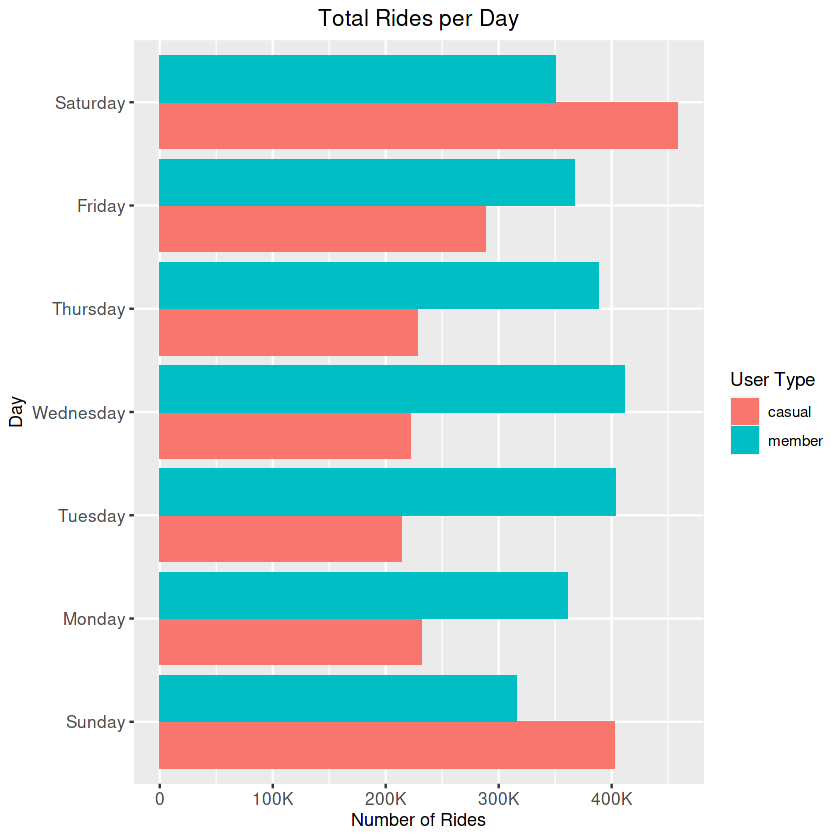

In [36]:
all_trips_cleaned %>% 
  group_by(user_type, day_of_week) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(user_type, day_of_week)  %>% 
  ggplot(aes(x = number_of_rides , y = day_of_week, fill = user_type)) +
  ggtitle("Total Rides per Day") + 
  xlab("Number of Rides") + ylab("Day") + labs(fill = "User Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title = element_text(size = 10.5)) +
  theme(axis.text = element_text(size = 10)) +
  scale_x_continuous(labels = scales::label_number_si(),breaks=seq(0,5000000,by=100000)) +
  geom_col(position = "dodge")

## Visualizing the average ride duration by user type

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


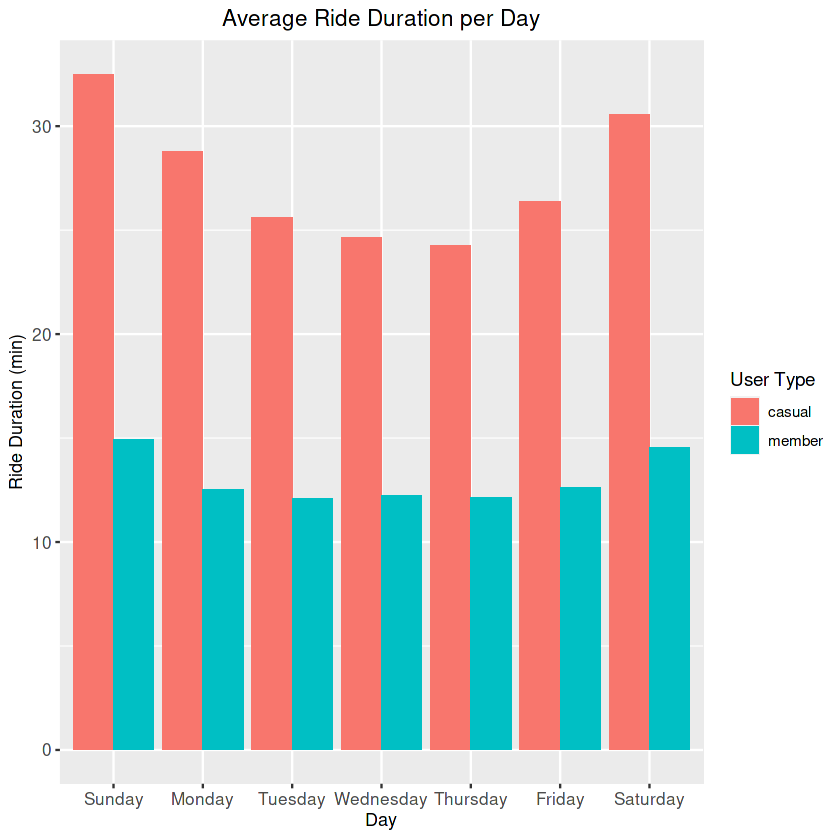

In [37]:
all_trips_cleaned %>%
  mutate(minutes = (ride_length/60)) %>% 
  group_by(user_type, day_of_week) %>% 
  summarise(average_duration = mean(minutes)) %>% 
  arrange(user_type, day_of_week)  %>% 
  ggplot(aes(day_of_week, average_duration, fill = user_type)) +
  ggtitle("Average Ride Duration per Day") + 
  xlab("Day") + ylab("Ride Duration (min)") + labs(fill = "User Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title = element_text(size = 10.5)) +
  theme(axis.text = element_text(size = 10)) +
  geom_col(position = "dodge")

## Visualizing the average ride duration by Month

`summarise()` has grouped output by 'user_type', 'month'. You can override
using the `.groups` argument.


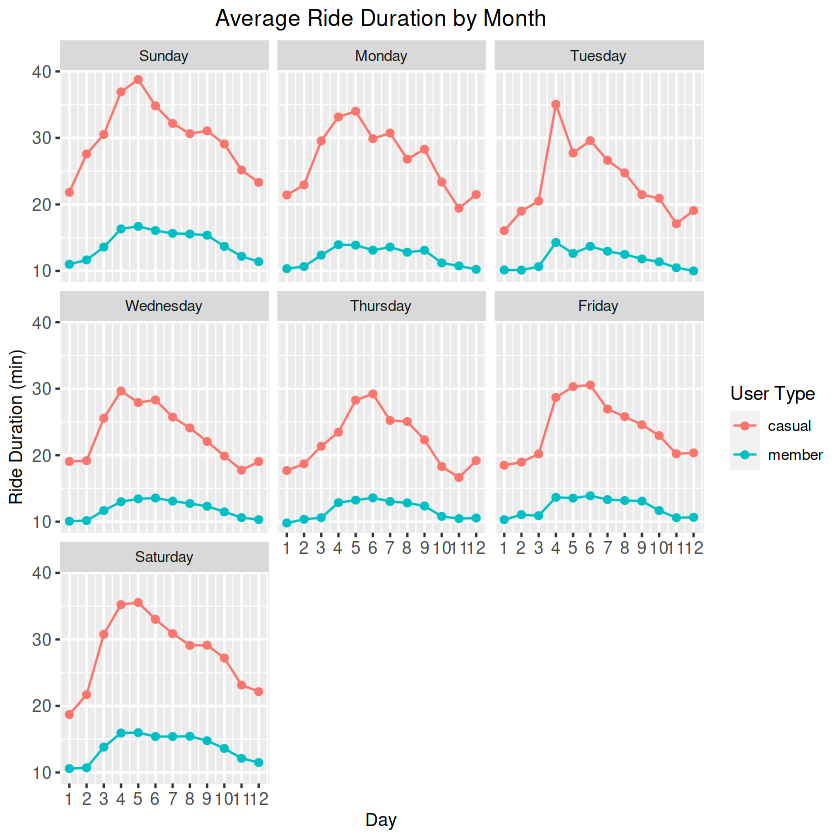

In [38]:
all_trips_cleaned %>% 
  mutate(minutes = (ride_length/60)) %>% 
  group_by(user_type, month, day_of_week) %>% 
  summarise(average = mean(minutes)) %>% 
  arrange(user_type, month)  %>% 
  ggplot(aes(x = month , y = average, color = user_type)) +
  geom_line() +
  geom_point() +
  ggtitle("Average Ride Duration by Month") + 
  xlab("Day") + ylab("Ride Duration (min)") + labs(color = "User Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title = element_text(size = 10.5)) +
  theme(axis.text = element_text(size = 10)) +
  scale_x_continuous(breaks=seq(1,12,by=1)) +
  facet_wrap(~day_of_week)

## Visualizing the total number of rides by quarter

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


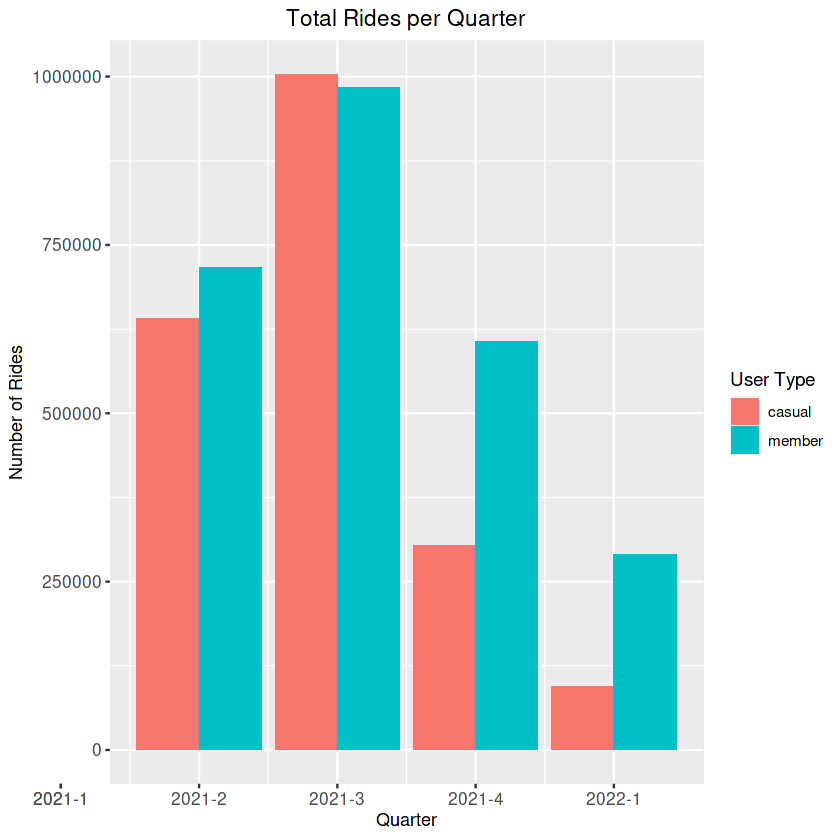

In [39]:
all_trips_cleaned %>% 
  group_by(user_type, quarter) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(user_type, quarter)  %>% 
  ggplot(aes(x = quarter , y = number_of_rides, fill = user_type)) +
  ggtitle("Total Rides per Quarter") + 
  xlab("Quarter") + ylab("Number of Rides") + labs(fill = "User Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title = element_text(size = 10.5)) +
  theme(axis.text = element_text(size = 10)) +
  geom_col(position = "dodge")

## Visualizing the total number of rides by user type

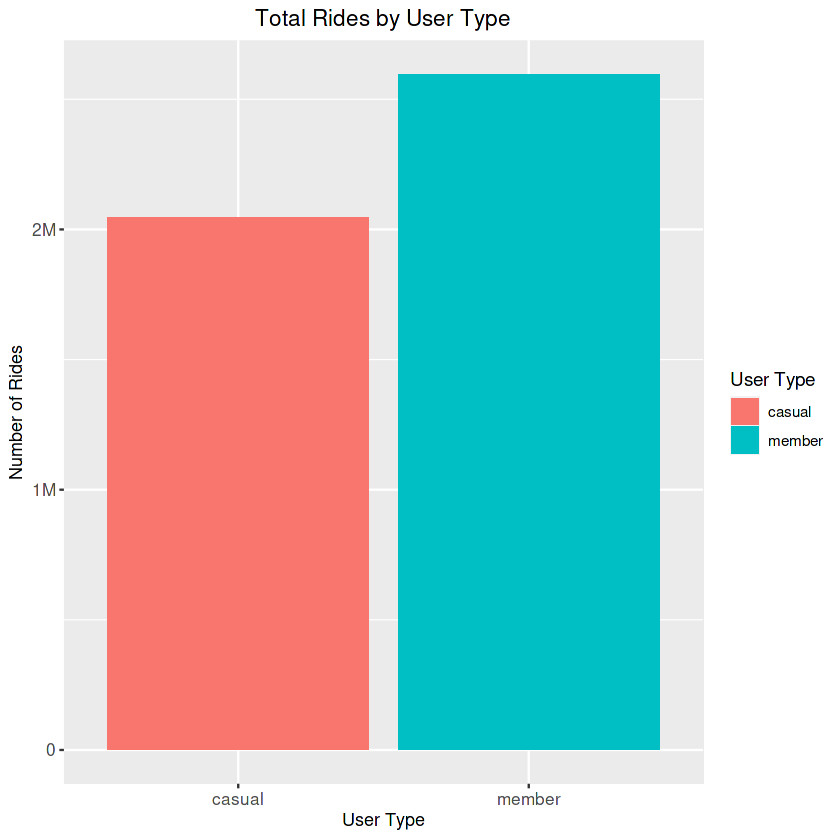

In [40]:
all_trips_cleaned %>% 
  group_by(user_type) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(x = user_type , y = number_of_rides, fill = user_type)) +
  ggtitle("Total Rides by User Type") + 
  xlab("User Type") + ylab("Number of Rides") + labs(fill = "User Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title = element_text(size = 10.5)) +
  theme(axis.text = element_text(size = 10)) +
  scale_y_continuous(labels = scales::label_number_si(),breaks=seq(0,3000000,by=1000000)) +
  geom_col(position = "dodge")

## Visualizing the total number of rides by bike type

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


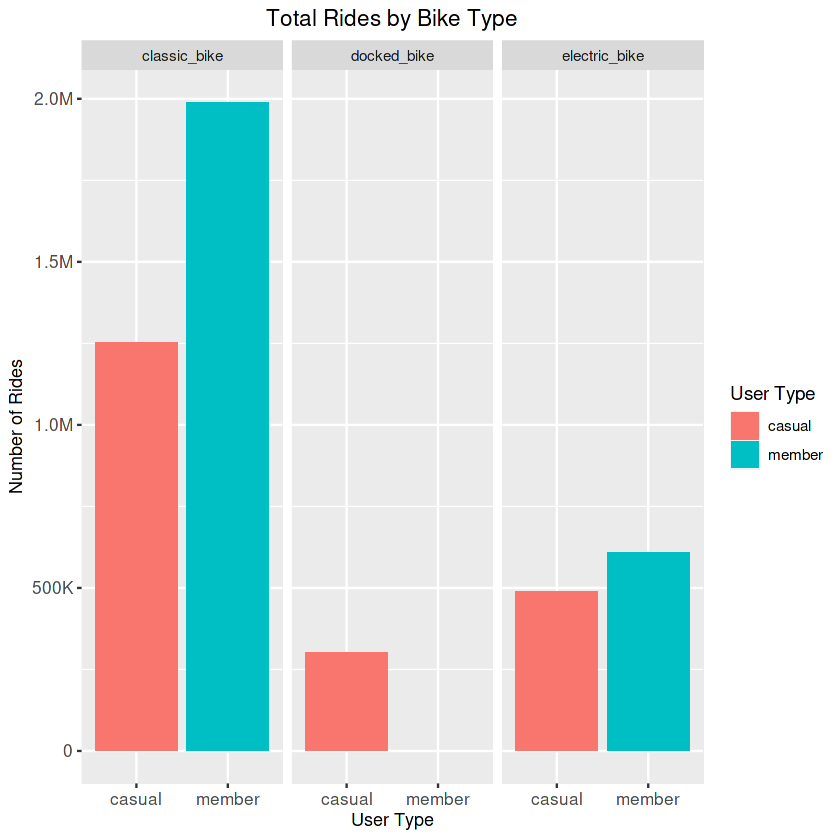

In [41]:
all_trips_cleaned %>% 
  group_by(user_type, bike_type) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(x = user_type , y = number_of_rides, fill = user_type)) +
  ggtitle("Total Rides by Bike Type") + 
  xlab("User Type") + ylab("Number of Rides") + labs(fill = "User Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title = element_text(size = 10.5)) +
  theme(axis.text = element_text(size = 10)) +
  scale_y_continuous(labels = scales::label_number_si(),breaks=seq(0,2000000,by=500000)) +
  geom_col(position = "dodge") +
  facet_wrap(~bike_type)

## Visualizing the total number of rides by bike type as Percentage

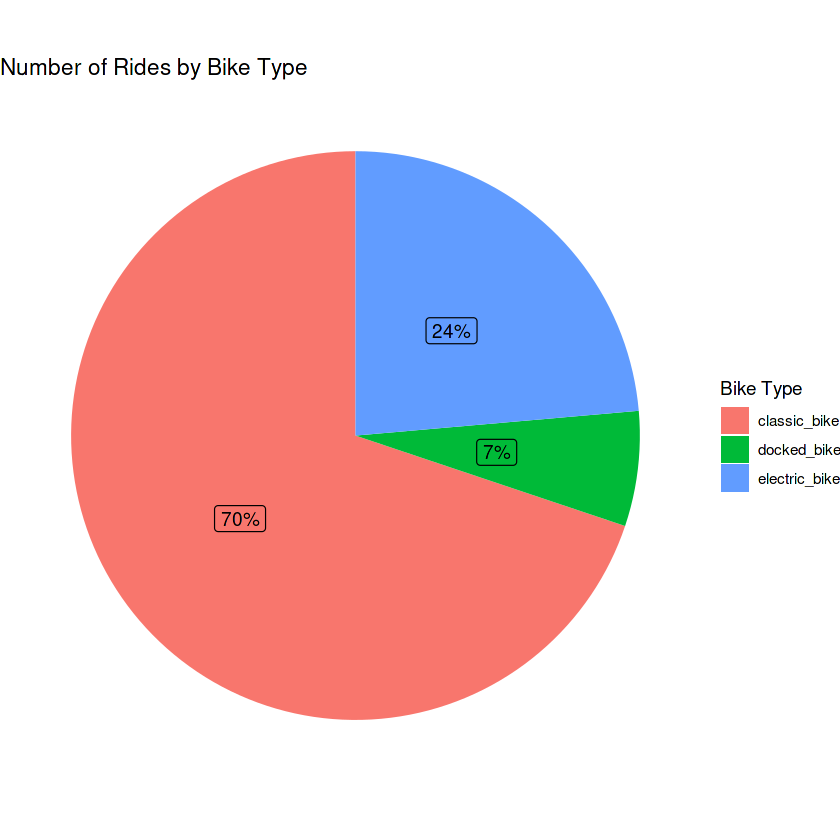

In [42]:
all_trips_cleaned %>% 
  group_by(bike_type) %>% 
  summarise(number_of_rides = n()) %>%
  mutate(percentage = number_of_rides/sum(number_of_rides),
  labels = scales::percent(percentage)) %>% 
  ggplot(aes(x = "", y = percentage, fill = bike_type)) +
  geom_col() +
  geom_label(aes(label = labels), position = position_stack(vjust = 0.5), show.legend = FALSE) +
  coord_polar("y", start = 0) +
  labs(title = "Number of Rides by Bike Type", x = "", y = "") + labs(fill = "Bike Type") +
  theme_void()

## Visualizing the top 20 start stations by number of trips

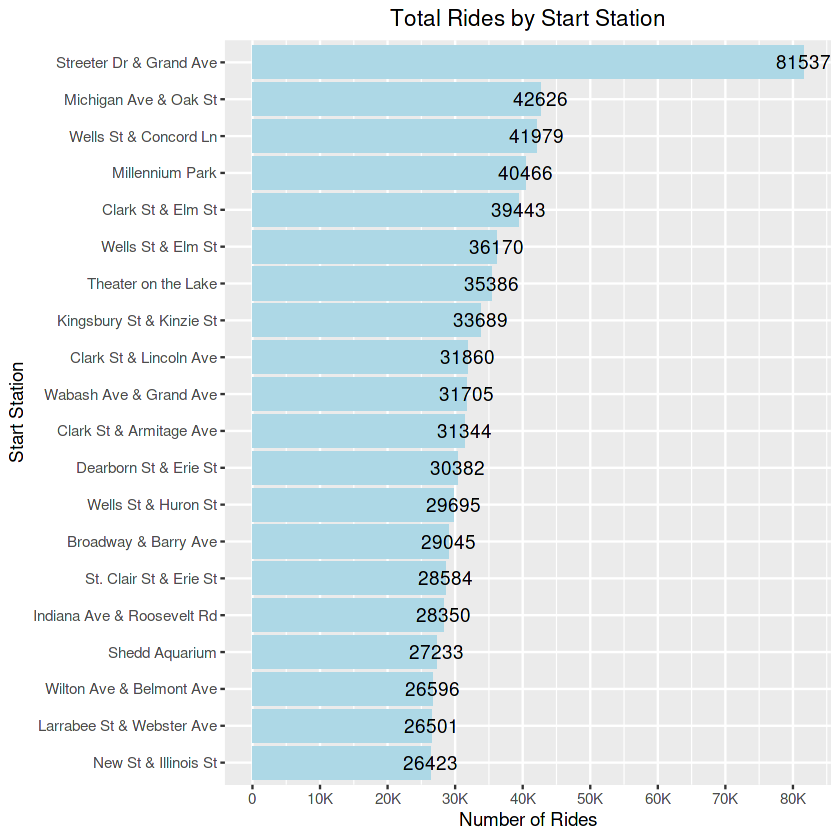

In [43]:
all_trips_cleaned %>% 
  group_by(from_station) %>% 
  summarise(number_of_rides = n()) %>%
  arrange(desc(number_of_rides)) %>% 
  slice(1:20) %>%
  ggplot(aes(number_of_rides, reorder(from_station, number_of_rides))) +
  scale_x_continuous(labels = scales::label_number_si(),breaks=seq(0,80000,by=10000)) +
  ggtitle("Total Rides by Start Station") + 
  xlab("Number of Rides") + ylab("Start Station") +
  theme(plot.title = element_text(hjust = 0.5)) +
  geom_bar(stat="identity",fill="lightblue") +
  geom_text(aes(label = number_of_rides))

## Visualizing the top 20 end stations by number of trips

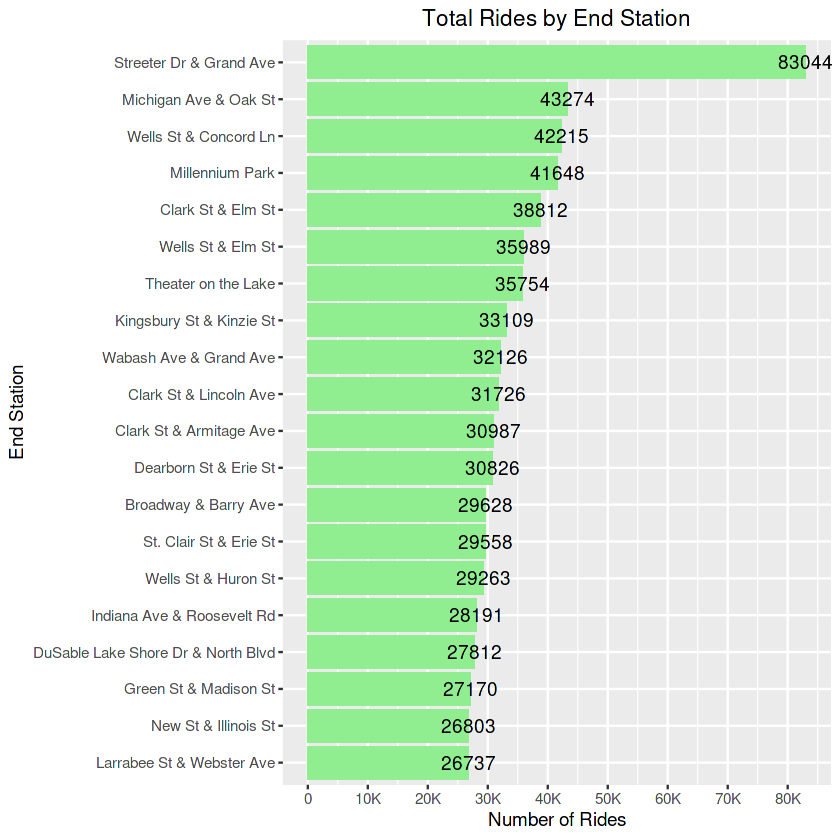

In [44]:
all_trips_cleaned %>% 
  group_by(to_station) %>% 
  summarise(number_of_rides = n()) %>%
  arrange(desc(number_of_rides)) %>% 
  slice(1:20) %>%
  ggplot(aes(number_of_rides, reorder(to_station, number_of_rides))) +
  geom_bar(stat="identity",fill="lightgreen") +
  scale_x_continuous(labels = scales::label_number_si(),breaks=seq(0,80000,by=10000)) +
  ggtitle("Total Rides by End Station") + 
  xlab("Number of Rides") + ylab("End Station") +
  theme(plot.title = element_text(hjust = 0.5)) +
  geom_text(aes(label = number_of_rides))